In [4]:
# 데이터 불러오기
import numpy as np

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

In [5]:
type(X_train)

numpy.ndarray

In [6]:
#2. 딥러닝 모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Train/Test 분할

# 모델 정의 (Keras MLP)
model = Sequential([
    Dense(512, activation='relu', input_shape=(2048,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)



/Users/jiwonju/anaconda3/envs/qml1w/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9528 - loss: 0.1767 - val_accuracy: 0.9676 - val_loss: 0.1275
Epoch 2/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9724 - loss: 0.0991 - val_accuracy: 0.9684 - val_loss: 0.1316
Epoch 3/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9792 - loss: 0.0636 - val_accuracy: 0.9646 - val_loss: 0.1464
Epoch 4/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9877 - loss: 0.0363 - val_accuracy: 0.9625 - val_loss: 0.1692
Epoch 5/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9906 - loss: 0.0261 - val_accuracy: 0.9647 - val_loss: 0.2105
Epoch 6/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9927 - loss: 0.0186 - val_accuracy: 0.9649 - val_loss: 0.2415
Epoch 7/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9939 - loss: 0.0174 - val_accuracy: 0.9660 - val_loss: 0.2371
Epoch 8/10
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9952 - loss: 0.0123 - val_accuracy: 0.

257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step
정확도: 96.98%


,precision,recall,f1-score,support
0,0.981,0.988,0.984,7952.00
1,0.558,0.426,0.483,272.00
accuracy,0.970,0.970,0.970,0.97
macro avg,0.769,0.707,0.734,8224.00
weighted avg,0.967,0.970,0.968,8224.00


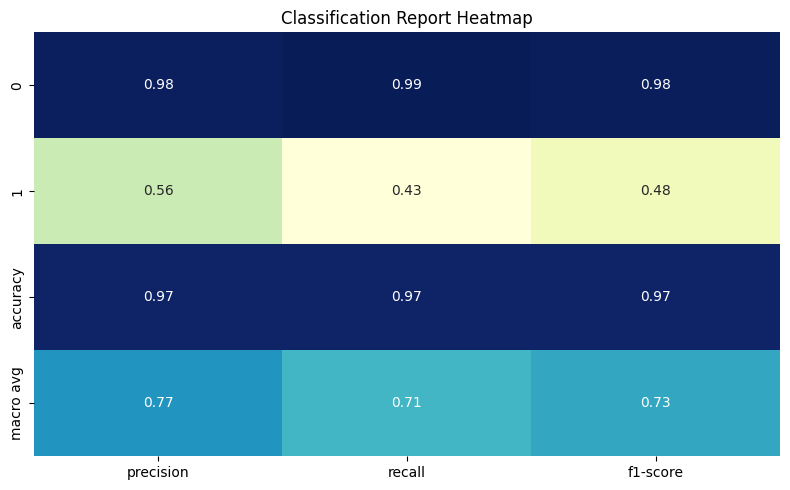

In [15]:
# 3. 예측 및 평가
# 3.1. 정확도
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("정확도: {:.2f}%".format(accuracy*100))

report_dict = classification_report(y_test, y_pred,output_dict=True)
df_report = pd.DataFrame(report_dict).transpose().round(3)
display(df_report)
# 'support'는 숫자 범위가 달라서 제외
df_plot = df_report.drop(columns=['support'], errors='ignore')
# 히트맵 그리기
plt.figure(figsize=(8, 5))
sns.heatmap(df_plot.iloc[:-1], annot=True, cmap="YlGnBu", cbar=False)
plt.title("Classification Report Heatmap")
plt.tight_layout()
plt.savefig("classification_report_heatmap.png", dpi=300)
plt.show()
df_report.to_csv("creport_DL.csv")



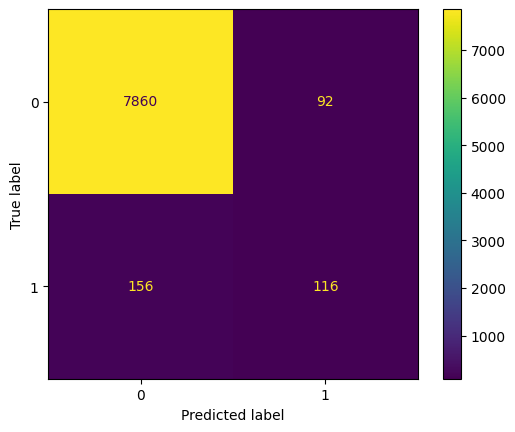

<Figure size 640x480 with 0 Axes>

In [9]:
# confusion matrix 평가
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
plt.savefig("image/hiv_DL_cm_RFC.png")

257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


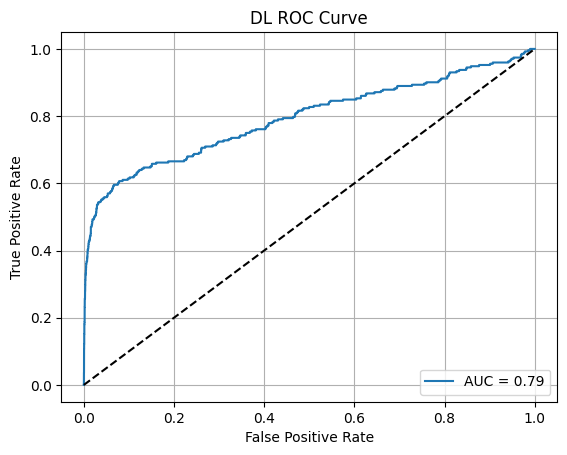

In [11]:
# 3.1. 정확도
from sklearn.metrics import roc_curve, auc
y_proba = model.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 분류 기준선
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DL ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig("image/DL_roc_curve.png", dpi=300)
plt.show()


In [ ]:
# print(X_features)
# print(y)